# ASTR507A:  Assignment 1. 
#### Francis Rossmann:  40065154

## Question 1: 
*(15 POINTS) 1 - Using the python version of Rebound compute the evolution of the 2:1 resonance argument for minor planets K13GD8G, K15RR7Y and K15VG6A. Although these minor planets all have semi-major axis values consistent with a 2:1 orbital commenserability with Neptune (the minor planet goes around the Sun once each time Neptune makes two solar orbits) not all are in mean-motion resonance with that planet.Determine which of those minor planets are and which are not in the 2:1 mean-motion resonance.*
___

### Methodology: 
For this problem, the 2:1 resonant angle $\theta_{2:1}$ between a Kuiper Belt Obkect (KBO) and Neptune can be calculated as follows: 

$$\theta_{2:1} = 2\lambda_{KBO} - \lambda_{Neptune} - \varpi_{KBO}$$

Where $\lambda$ is the mean longitude of the particle's orbit, given as: 

$$\lambda = \omega + \Omega + M$$

Where $\omega$ is the argument of perihelion, $\Omega$ is the particle's longitude of ascending node,  and $M$ is the mean anomaly. $\varpi$ is simply the longitude of pericenter given as: $$ \varpi = \Omega + \omega$$.

A minor planet trapped in a 2:1 mean-motion resonance with Neptune will show a libration of it's resonance argument calculated with respect to Neptune's mean longitude, $\Theta_{2:1}$, about some mean angle. Otherwise, the resonance angle of a particle that is not trapped in a 2:1 resonance with Neptune will  will vary over the entire range of $0$ to $2\pi$. 
___

#### Setting up a REBOUND simulation: 

A heliocentric REBOUND simulation is set up with the Sun, Jupiter, Saturn, Uranus, Neptune, and the KBOs 'K13GD8G','K15RR7Y', and 'K15VG6A': 

In [73]:
%reset
import rebound
import numpy as np 
import matplotlib.pyplot as plt 

theKBOs = ['K13GD8G','K15RR7Y','K15VG6A']

sim = rebound.Simulation()
sim.add('Sun')
sim.add('Jupiter')
sim.add('Saturn')
sim.add('Uranus')
sim.add('Neptune')
for KBO in theKBOs: 
    sim.add(KBO)
sim.save('checkpoint.bin')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'K13GD8G'... Found: (2013 GG138).
Searching NASA Horizons for 'K15RR7Y'... Found: (2015 RY277).
Searching NASA Horizons for 'K15VG6A'... Found: (2015 VA166).


___
### Integration
The integration is run over the span of one millions years (where one year = $2\pi$) for 10,000 time outputs and a timestep of 0.1 years. For each KBO, it's 2:1 resonance argument is computed with respect to Neptune's orbit and saved at each time output: 

In [74]:
del sim
sim = rebound.Simulation('checkpoint.bin')

sim.integrator = 'whfast'       # Choose integrator
sim.move_to_com()               # Move to centre-of-mass

year = 2.*np.pi                  # One 2-pi orbit
rad2deg = 180./np.pi             # Constant to convert radians -> degrees
integrationTime = 10.E5*year     # Integration time, in years
N_outputs = 10000                 # Number of outputs

# Generate a linearly spaced time vector from 0 to the final integration
# time with 'N_outputs' elements: 
times = np.linspace(0.,integrationTime, N_outputs)      
sim.dt = 0.1*year      # Set integrator time step
sim.status()            # Print status

# Make a dictionary to link the body name to it's index in the 
# 'orbits' output of 'orbits = sim.calculate_orbits()':
bodies = {
    'Jupiter': 0,
    'Saturn': 1,
    'Uranus': 2,  
    'Neptune': 3,
    theKBOs[0]: 4,
    theKBOs[1]: 5,
    theKBOs[2]: 6,
    }

theta_N21 = np.zeros((int(N_outputs),3))        # Pre-allocate theta
# Loop over time in times: 
for ii,time in enumerate(times): 
    sim.integrate(time)     # The integration
    orbits = sim.calculate_orbits()     # Calculate orbits @ this time step

    # Loop through the KBOs and calculate their 2:1 resonant argument with Neptune,
    # using enumerate(theKBOS) to index into the theta variable's columns, where each
    # column represents one of the KBO's resonance angle:
    for ik,KBO in enumerate(theKBOs):
        theta_N21[ii,ik] = rad2deg*(2*orbits[bodies[KBO]].l - orbits[bodies['Neptune']].l - orbits[bodies[KBO]].pomega)
    
theta_N21 = theta_N21%360

---------------------------------
REBOUND version:     	3.14.0
REBOUND built on:    	Jan 23 2021 19:48:32
Number of particles: 	8
Selected integrator: 	whfast
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.628319
---------------------------------
<rebound.Particle object, m=1.0 x=-0.006835041142661124 y=0.005845665586324969 z=0.0001114328892569797 vx=-0.00038717324723117053 vy=-0.0003516349297837391 vz=1.2212862666028697e-05>
<rebound.Particle object, m=0.0009547919152112404 x=3.193314246730351 y=-3.947640307827273 z=-0.05506630070955769 vx=0.3356569225120324 vy=0.2966425845309137 vz=-0.008739771662194496>
<rebound.Particle object, m=0.0002858856727222417 x=5.600557454682547 y=-8.252795952700218 z=-0.07947356056597045 vx=0.2502619889293872 vy=0.18132073909051563 vz=-0.013118841946194103>
<rebound.Particle object, m=4.36624373583127e-05 x=15.275413147196026 y=12.544905665158545 z=-0.15130282208491808 vx=-0.14678825271226245 vy=0.16603824221209793 vz=0.0025182174488

___

### Results & Discussion: 

*Figure 1* below shows the 2:1 resonance arguent for each of the three KBOs calculated with respect to Neptune's orbit. The resonance argument for KBO 'K13GD8G' can be seen cycling through $0 : 360$ degrees with some circulating frequency and does not show any libration. The resonance arguments for KBOs 'K1557RY' and 'K15VG6A' can both be seen librating; the amplitude of 'K15RR7Y's libration is much larger in magnitude than 'K1VG6A's libration amplitude. The mean values for the librating resonance angles are given as $\Theta_{2:1} = 179.6^{\circ}$ and $\Theta_{2:1} = 65.2^{\circ}$, respectively. 

___

### Conclusion: 
From these results we can conclude that KBO 'K13GD8G' is not in a 2:1 resonance with Neptune. 
Both 'K15RR7Y' and 'K15VG6A' show a 2:1 resonance with Neptune.
___

K13GD8G has mean resonant angle of 180.73675474278699
K15RR7Y has mean resonant angle of 179.58681961499707
K15VG6A has mean resonant angle of 65.17016831277239


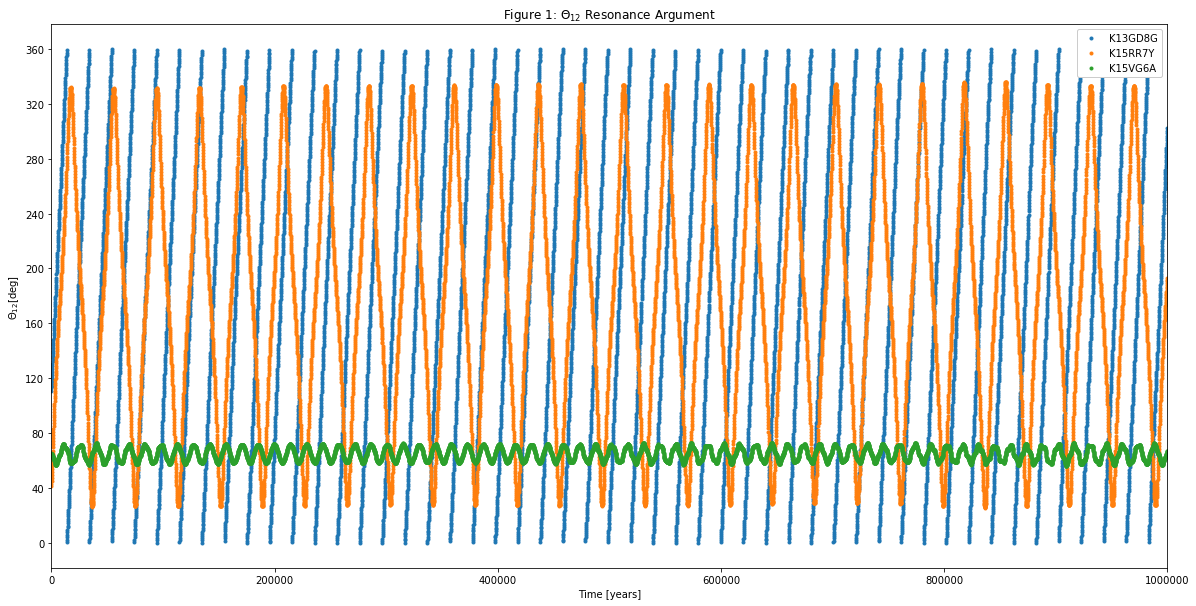

In [75]:
%matplotlib inline 
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
for ik,KBO in enumerate(theKBOs):
    plt.plot(times/year,theta_N21[:,ik],'.')
    print(f"{KBO} has mean resonant angle of {np.mean(theta_N21[:,ik])}")
plt.xlabel('Time [years]')
plt.ylabel(r"$\Theta_{12}$[deg]")
plt.legend(theKBOs, loc='upper right',framealpha=1);
ax.set_xlim([0, np.max(times)/year]);
plt.title(r"Figure 1: $\Theta_{12}$ Resonance Argument");
plt.yticks(np.arange(0, 360+40, 40));


___
___
### Question 2: 
___

*Determine which resoance K14UM9M is in, if any.* 

From Kepler's Third Law we can write the relationship between the semi-major axes and the orbital period of two particles rotating about a centre of mass as: 

$$\frac{a_{2}}{a_{1}} = (\frac{P_{2}}{P_{1}})^{\frac{2}{3}} $$

Where, for example, the ratio of $\frac{P_{2}}{P_{1}} = \frac{5}{2}$ is associated with a 5:2 mean-motion resonance. The ratio of $\frac{a_{2}}{a_{1}}$ for K14UM9M and Neptune is approximately 1.45, which gives a period ratio of approximately 1.75, or $\frac{7}{4}$. To test if K14UM9M is in a 7:4 resonance with Neptune we can calculate the resonant argument as: 

$$\theta_{7:4} = 7\lambda_{KBO} - 4\lambda_{Neptune} - \varpi_{KBO}$$


Adding K15UM9M to the prior simulation and running a similar integration for $\theta_{7:4}$:

Searching NASA Horizons for 'K14UM9M'... Found: (2014 UM229).
---------------------------------
REBOUND version:     	3.14.0
REBOUND built on:    	Jan 23 2021 19:48:32
Number of particles: 	9
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.628319
---------------------------------
<rebound.Particle object, m=1.0 x=-0.006833519842300683 y=0.0058447365636620785 z=0.00011146049273909063 vx=-0.0003870164392109616 vy=-0.00035015391209233424 vz=1.2329868810227314e-05>
<rebound.Particle object, m=0.0009547919152112404 x=3.193315768030711 y=-3.9476412368499356 z=-0.05506627310607558 vx=0.3356570793200526 vy=0.2966440655486051 vz=-0.008739654656050297>
<rebound.Particle object, m=0.0002858856727222417 x=5.600558975982907 y=-8.252796881722881 z=-0.07947353296248834 vx=0.25026214573740746 vy=0.18132222010820703 vz=-0.013118724940049904>
<rebound.Particle object, m=4.36624373583127e-05 x=15.275414668496387 y=12.544904736135882 z=-0.15130279448143596 

Text(0.5, 1.0, 'Figure 2: K14UM9M $\\Theta_{74}$ Resonance Argument')

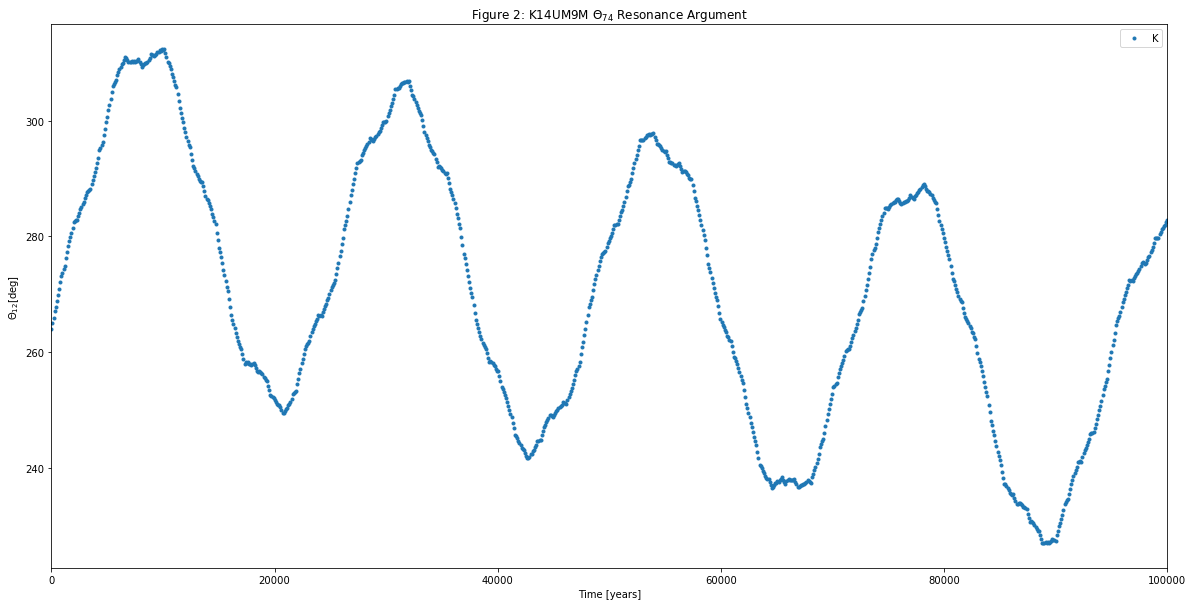

In [76]:
theKBO = 'K14UM9M'

del sim
sim = rebound.Simulation('checkpoint.bin')
sim.add(theKBO)

integrationTime = 1.E5*year      # Integration time, in years
N_outputs = 1000                 # Number of outputs

# Generate a linearly spaced time vector from 0 to the final integration
# time with 'N_outputs' elements: 
times = np.linspace(0.,integrationTime, N_outputs)      
sim.dt = 0.1*year       # Set integrator time step
sim.status()            # Print status

# Update the dictionary to link KBO to it's index in the 
# 'orbits' output of 'orbits = sim.calculate_orbits()':
bodies.update({theKBO : 7})

orbits = sim.calculate_orbits()
# theRatio = orbits[bodies['K149UM9M']].a/orbits[bodies['Neptune']].a
# print(f'The decimal ratio between semi-major axes of {theKBO} and Neptune is {theRatio}')

#%
theta = np.zeros((int(N_outputs)))       # Pre-allocate theta
# Loop over time in times: 
for ii,time in enumerate(times): 
    sim.integrate(time)     # The integration
    orbits = sim.calculate_orbits()     # Calculate orbits @ this time step
    theta[ii] = rad2deg*(7*orbits[bodies[theKBO]].l  - 4*orbits[bodies['Neptune']].l  - orbits[bodies[theKBO]].pomega)
theta = theta%360

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
plt.plot(times/year,theta,'.')
plt.xlabel('Time [years]')
plt.ylabel(r"$\Theta_{7:4}$[deg]")
plt.legend(theKBO, loc='upper right');
ax.set_xlim([0, np.max(times)/year]);
plt.title(r"Figure 2: K14UM9M $\Theta_{74}$ Resonance Argument");

___ 
### Results & Discussion: 
Figure 2 above shows the 7:4 resonant argument for K14UM9M with Neptune. Over relatively shorter timescales $\Theta_{7:2}$ angle oscillates in time but this signal is superposed on a longer-term signal which is circulating (i.e. the mean 7:4 resonant argument is circulating over long time scale). Because the long-term signal is circulating, K14UM9M is not in resonance. 